In [18]:
# Importing the Qiskit standard library and setting up an account
import math
import numpy as np
from math import sqrt
from numpy import pi 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import XGate
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_aer import Aer
from time import process_time

In [19]:
# qiskit 2.2.1
backend = Aer.get_backend('unitary_simulator')

In [20]:
# Construction of the Uf matrix
nn=3
oracle=np.identity(2**nn)
oracle[2,2]=-1
print(oracle)
Uf=Operator(oracle)
Operator.is_unitary(Uf) 


[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


True

In [21]:
# Creating quantum registers, 
# classical registers and a quantum circuit 
# representing the created Uf operator 
# Number of qubits and bits
n0=nn
# Quantum Register
q0 = QuantumRegister(n0)
# "Empty" quantum circuit
# for a gate named 'Uf'
CircuitUf = QuantumCircuit(q0,name='Uf')

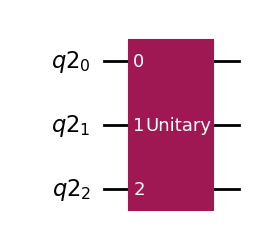

In [22]:
# Attaching the Uf operator to the circuit
# representing the Uf gate
CircuitUf.append(Uf,[q0[0],q0[1],q0[2]])
# Sketch of a quantum circuit
CircuitUf.draw(output='mpl')

In [23]:
# Transforming the Uf operator 
# into a uf quantum gate 
# denoted as Uf
uf=CircuitUf.to_gate()

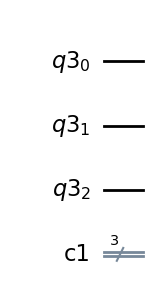

In [24]:
# Creating an "empty" warp
# quantum circuit of Grover's algorithm
# Number of qubits and bits
n=nn 
# Quantum Register
q = QuantumRegister(n) 
#  Classical Register
c = ClassicalRegister(n) 
# "Empty" quantum circuit -
# - the core of Grover's algorithm
Circuit = QuantumCircuit(q,c) 
# Sketch of a quantum circuit
Circuit.draw(output='mpl') 

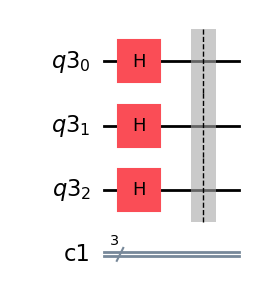

In [25]:
# |fi> State initiation 
Circuit.h(q[0])
Circuit.h(q[1])
Circuit.h(q[2])
Circuit.barrier()
# Sketch of a quantum circuit
Circuit.draw(output='mpl')

In [26]:
repeat=math.floor((pi/4)*sqrt(2**n))
print(repeat)

2


In [27]:
mccx=XGate().control(n0-1)

N= 1


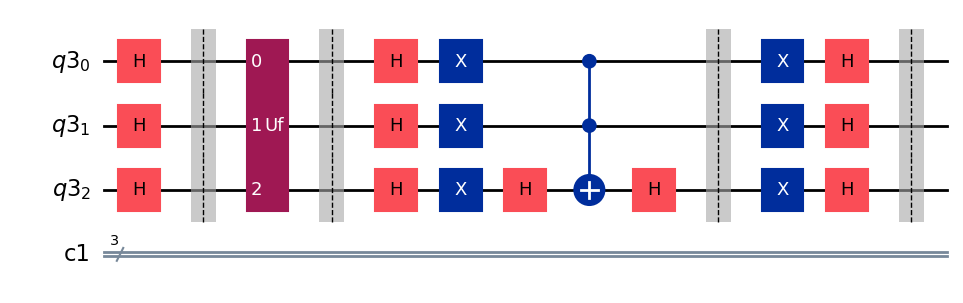

N= 2


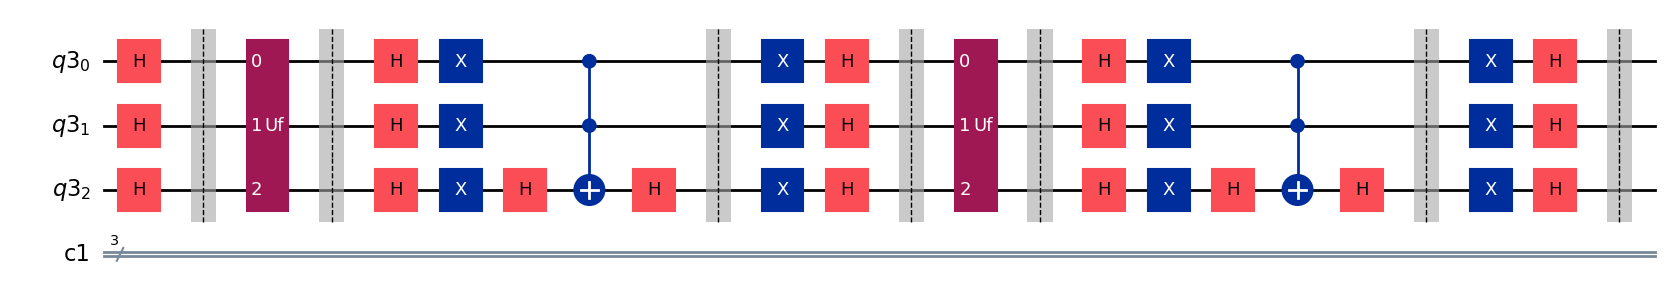

In [28]:
for ii in range(repeat):
    Circuit.append(uf,[0,1,2])
    Circuit.barrier() 
    # Beginning of the implementation of the W diffusion operator
    Circuit.h(q[0])
    Circuit.h(q[1])
    Circuit.h(q[2])
    Circuit.x(q[0])
    Circuit.x(q[1])
    Circuit.x(q[2])
    Circuit.h(q[2])
    Circuit.append(mccx, [q[0],q[1],q[2]])
    Circuit.h(q[2])
    Circuit.barrier()
    Circuit.x(q[0])
    Circuit.x(q[1])
    Circuit.x(q[2])
    Circuit.h(q[0])
    Circuit.h(q[1])
    Circuit.h(q[2]) 
    # The end of the implementation of the W diffusion operator
    Circuit.barrier()
    print("N=",ii+1)
    # print(Circuit)
    display(Circuit.draw(output='mpl'))

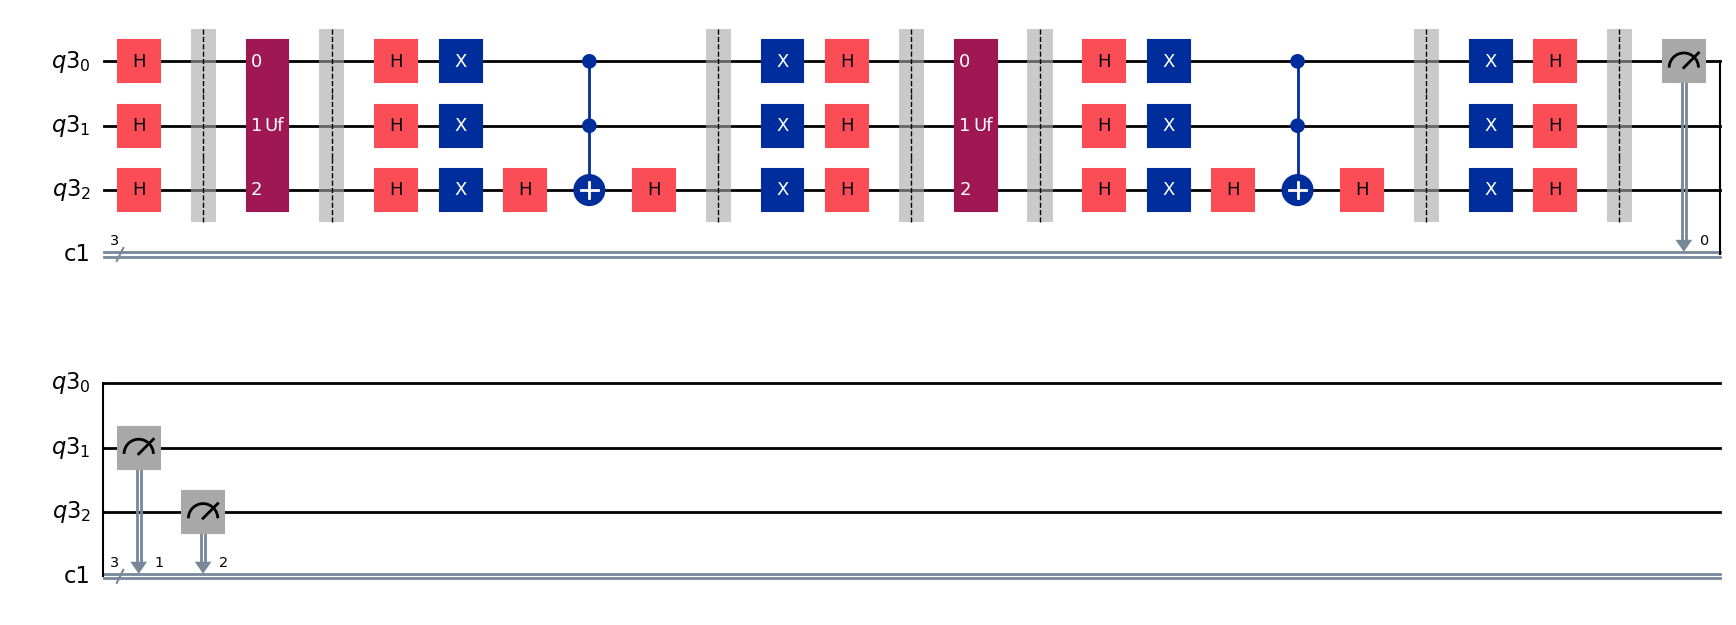

In [29]:
# Adding measurement operations to the quantum circuit
Circuit.measure(q[0],c[0])
Circuit.measure(q[1],c[1])
Circuit.measure(q[2],c[2])
Circuit.draw(output='mpl') # 

In [30]:
# Start the stopwatch / counter  
t1_start = process_time() 

In [31]:
# Select a quantum simulator (or processor).
backend_sim = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the specific backend (needed in qiskit 1.x)
transpiled_circuit = transpile(Circuit, backend_sim)

# Perform quantum calculations
job_sim0 = backend_sim.run(transpiled_circuit, shots=1024)
sim_result0 = job_sim0.result()

# Numerical presentation of measurement results
print(sim_result0.get_counts())

{'010': 974, '111': 7, '101': 8, '000': 9, '001': 10, '011': 7, '100': 9}


In [32]:
# Stop the stopwatch / counter 
t1_stop = process_time() 
print("Elapsed time:", t1_stop, t1_start)  
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)  

Elapsed time: 4.015625 3.703125
Elapsed time during the whole program in seconds: 0.3125


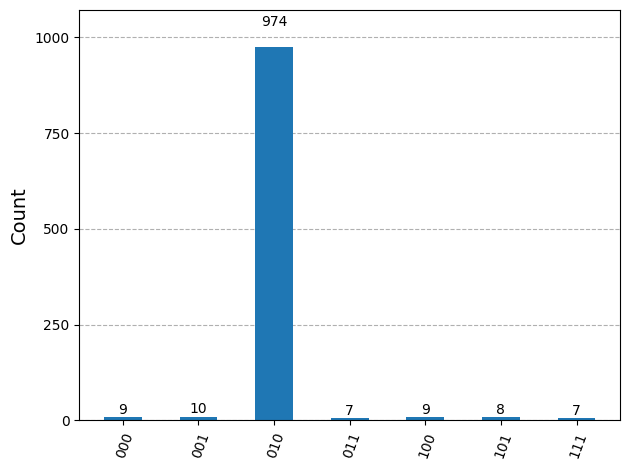

In [33]:
# Graphical presentation of X measurement results
plot_histogram(sim_result0.get_counts(Circuit))

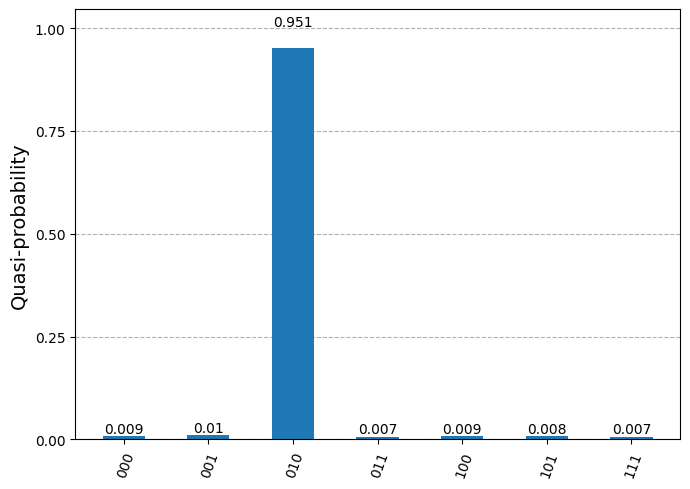

In [34]:
# Graphical presentation of X measurement results
plot_distribution(sim_result0.get_counts(Circuit))

n=2, optimal r=1
n=3, optimal r=2
n=4, optimal r=3
n=5, optimal r=4
n=6, optimal r=6
Iteration 1: P(|001000>) = 0.1279
Iteration 2: P(|001000>) = 0.3311
Iteration 3: P(|001000>) = 0.6045
Iteration 4: P(|001000>) = 0.8203
Iteration 5: P(|001000>) = 0.9600
Iteration 6: P(|001000>) = 0.9980
Final measurement counts: {'001000': 1019, '101101': 1, '001111': 1, '011011': 1, '101011': 1, '011101': 1}


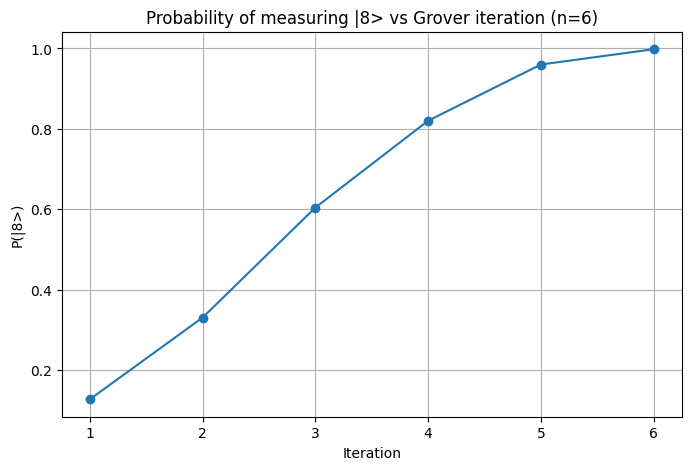

Iteration 1: P(|001000>) = 0.1514
Iteration 2: P(|001000>) = 0.3389
Iteration 3: P(|001000>) = 0.5811
Iteration 4: P(|001000>) = 0.7930
Iteration 5: P(|001000>) = 0.9570
Iteration 6: P(|001000>) = 0.9961
Iteration 7: P(|001000>) = 0.9199
Iteration 8: P(|001000>) = 0.7227
Iteration 9: P(|001000>) = 0.4795
Iteration 10: P(|001000>) = 0.2393
Iteration 11: P(|001000>) = 0.0498
Iteration 12: P(|001000>) = 0.0000
Final measurement counts: {'101111': 9, '000110': 17, '110001': 20, '010111': 19, '001111': 14, '100110': 19, '111010': 21, '001110': 14, '111011': 19, '100101': 14, '001101': 19, '111100': 16, '100100': 16, '101010': 21, '110110': 16, '000001': 13, '010000': 27, '111110': 14, '100010': 8, '001011': 11, '001010': 19, '100001': 13, '111111': 18, '011000': 13, '011001': 16, '011110': 14, '101110': 20, '000101': 15, '110010': 25, '011011': 18, '111101': 18, '001100': 13, '100011': 15, '000010': 21, '101011': 18, '110101': 14, '101001': 17, '100000': 11, '000000': 19, '110111': 16, '110

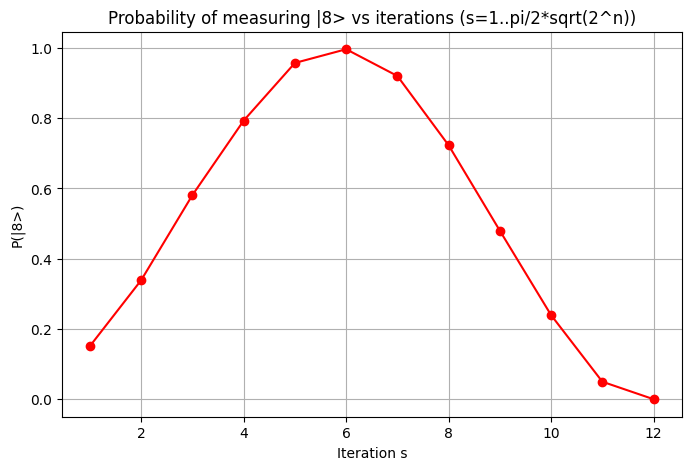

Iteration 1: P(|00>) = 1.0000
Final measurement counts: {'00': 1024}
Iteration 1: P(|000>) = 0.7744
Iteration 2: P(|000>) = 0.9590
Final measurement counts: {'000': 958, '100': 7, '010': 10, '110': 9, '111': 11, '001': 6, '101': 16, '011': 7}
Iteration 1: P(|1000>) = 0.5098
Iteration 2: P(|1000>) = 0.9189
Iteration 3: P(|1000>) = 0.9688
Final measurement counts: {'1000': 984, '1100': 5, '0010': 2, '0101': 4, '1101': 5, '0001': 5, '0110': 4, '0111': 4, '0100': 3, '1111': 2, '1110': 1, '0011': 1, '1001': 1, '1011': 3}
Iteration 1: P(|01000>) = 0.2402
Iteration 2: P(|01000>) = 0.5859
Iteration 3: P(|01000>) = 0.9004
Iteration 4: P(|01000>) = 0.9990
Final measurement counts: {'01000': 1022, '10010': 1, '10111': 1}
Iteration 1: P(|001000>) = 0.1543
Iteration 2: P(|001000>) = 0.3584
Iteration 3: P(|001000>) = 0.6201
Iteration 4: P(|001000>) = 0.8359
Iteration 5: P(|001000>) = 0.9590
Iteration 6: P(|001000>) = 0.9980
Final measurement counts: {'001000': 1019, '100100': 1, '111100': 1, '010010

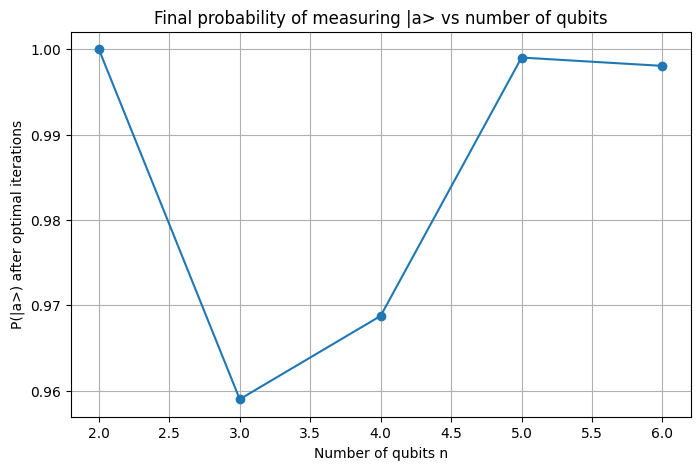

In [38]:
# Importing the Qiskit standard library and setting up an account
import math
import numpy as np
from math import sqrt, pi, floor
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.quantum_info import Operator
from qiskit.circuit.library import XGate
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_aer import Aer
from time import process_time
import matplotlib.pyplot as plt

# -------------------------------
# Parameters
# -------------------------------
student_id = 151944
shots = 1024
backend_sim = Aer.get_backend('qasm_simulator')

# -------------------------------
# Function to construct Uf operator for given n and target state a
# -------------------------------
def create_oracle(n, a):
    oracle = np.identity(2**n)
    oracle[a, a] = -1
    Uf = Operator(oracle)
    return Uf

# -------------------------------
# Function to create diffusion operator W
# -------------------------------
def grover_diffusion_circuit(q, n):
    # Multi-controlled X gate
    mccx = XGate().control(n-1)
    diffusion = QuantumCircuit(n)
    # Apply diffusion operator
    for i in range(n):
        diffusion.h(i)
        diffusion.x(i)
    diffusion.h(n-1)
    diffusion.append(mccx, range(n))
    diffusion.h(n-1)
    for i in range(n):
        diffusion.x(i)
        diffusion.h(i)
    return diffusion.to_gate(label="W")

# -------------------------------
# Function to run Grover's algorithm for n qubits, target a, and r iterations
# Returns the probability of measuring |a> at each iteration
# -------------------------------
def run_grover(n, a, r):
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    Circuit = QuantumCircuit(q, c)

    # Initialize |phi> state
    for i in range(n):
        Circuit.h(q[i])
    Circuit.barrier()

    # Oracle gate
    Uf = create_oracle(n, a)
    CircuitUf = QuantumCircuit(q, name='Uf')
    CircuitUf.append(Uf, q)
    uf = CircuitUf.to_gate()

    # Diffusion operator gate
    W = grover_diffusion_circuit(q, n)

    # Track probabilities
    prob_a_list = []

    # Iterative Grover operator
    for ii in range(r):
        Circuit.append(uf, q)
        Circuit.barrier()
        Circuit.append(W, q)
        Circuit.barrier()

        # Copy circuit to measure probability of target
        Circuit_tmp = Circuit.copy()
        Circuit_tmp.measure(q, c)
        job = backend_sim.run(transpile(Circuit_tmp, backend_sim), shots=shots)
        counts = job.result().get_counts()
        prob_a = counts.get(format(a, f'0{n}b'), 0)/shots
        prob_a_list.append(prob_a)
        print(f"Iteration {ii+1}: P(|{format(a, f'0{n}b')}>) = {prob_a:.4f}")

    # Final measurement
    Circuit.measure(q, c)
    job_final = backend_sim.run(transpile(Circuit, backend_sim), shots=shots)
    sim_result_final = job_final.result()
    counts_final = sim_result_final.get_counts()
    print("Final measurement counts:", counts_final)

    return prob_a_list, counts_final

# -------------------------------
# Task 1: Determine optimal r for n = 2..6
# -------------------------------
optimal_r_dict = {}
for n in range(2,7):
    N = 2**n
    r_opt = floor((pi/4)*sqrt(N))
    optimal_r_dict[n] = r_opt
    print(f"n={n}, optimal r={r_opt}")

# -------------------------------
# Task 3: Grover simulation for n=6 and target state a
# -------------------------------
n = 6
a = student_id % 2**n
r_opt = optimal_r_dict[n]
prob_a_list, counts_final = run_grover(n, a, r_opt)

# Plot probability vs iteration
plt.figure(figsize=(8,5))
plt.plot(range(1, r_opt+1), prob_a_list, marker='o')
plt.title(f"Probability of measuring |{a}> vs Grover iteration (n={n})")
plt.xlabel("Iteration")
plt.ylabel(f"P(|{a}>)")
plt.grid(True)
plt.savefig("outputs/probability_vs_iterations.png")
plt.show()

# -------------------------------
# Task 4: Repeat simulation for s=1..pi/2*sqrt(2^n)
# -------------------------------
max_s = floor((pi/2)*sqrt(2**n))
prob_a_list_extended, _ = run_grover(n, a, max_s)

plt.figure(figsize=(8,5))
plt.plot(range(1, max_s+1), prob_a_list_extended, marker='o', color='r')
plt.title(f"Probability of measuring |{a}> vs iterations (s=1..pi/2*sqrt(2^n))")
plt.xlabel("Iteration s")
plt.ylabel(f"P(|{a}>)")
plt.grid(True)
plt.savefig("outputs/probability_vs_iterations_extended.png")
plt.show()

# -------------------------------
# Task 5: Grover simulation for n=2..6 for optimal r
# -------------------------------
pa_n_list = []
for n in range(2,7):
    a_n = student_id % 2**n
    r_n = optimal_r_dict[n]
    prob_a_list, counts_final = run_grover(n, a_n, r_n)
    pa_n_list.append(prob_a_list[-1])  # final probability after optimal r

plt.figure(figsize=(8,5))
plt.plot(range(2,7), pa_n_list, marker='o')
plt.title("Final probability of measuring |a> vs number of qubits")
plt.xlabel("Number of qubits n")
plt.ylabel("P(|a>) after optimal iterations")
plt.grid(True)
plt.savefig("outputs/final_probability_vs_n.png")
plt.show()
